In [33]:
import os
import subprocess

import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Compose, CenterCrop
from torchvision import datasets
import matplotlib.pyplot as plt

from nuy_v2_loader import NYUV2Dataset

In [84]:
# CONSTANTS
SEED = 43

In [85]:
np.random.seed(SEED)

In [ ]:
if not os.path.exists('datasets/diode.tar.gz'):
    subprocess.run(
        ['curl', '-L', '-o', 'datasets/diode.tar.gz', 'http://diode-dataset.s3.amazonaws.com/train.tar.gz'],
        check=True
    )

In [75]:
NYU_V2_IMG_DIMENSION = (448, 608)

transforms = Compose([
  ToTensor(), CenterCrop(NYU_V2_IMG_DIMENSION)
])
train_dataset = NYUV2Dataset("ds", transforms, transforms, 'train', download=True)
test_dataset = NYUV2Dataset("ds", transforms, transforms, 'test', download=True)

Failed to load tar file
Finished loading dataset
Failed to load tar file
Finished loading dataset


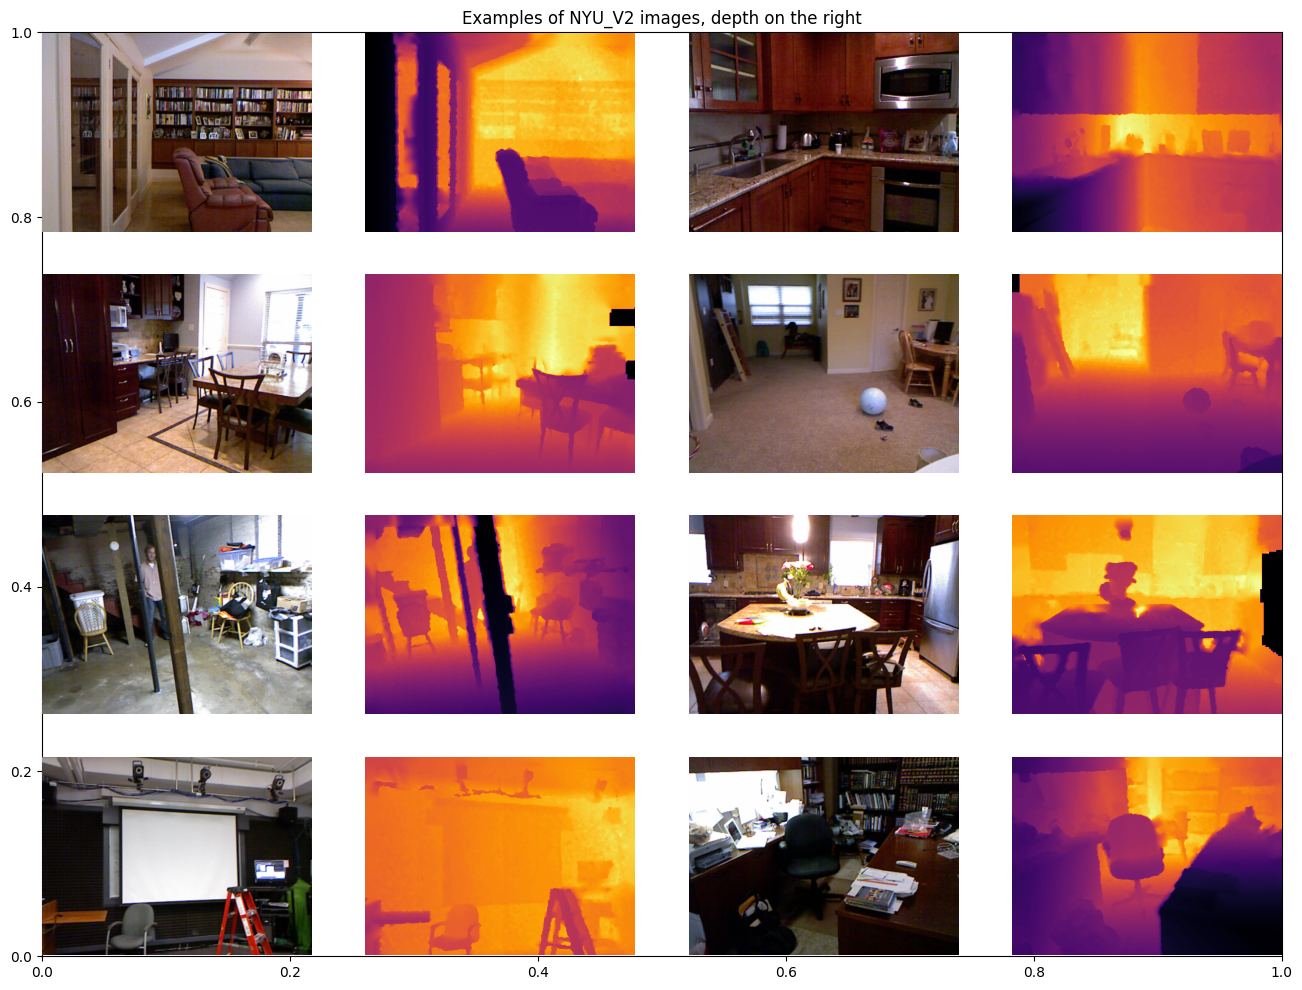

In [89]:
random_pick = np.random.randint(0, 45000, 8)

plt.figure(figsize=(16, 12))
plt.title("Examples of NYU_V2 images, depth on the right")
for i, img in enumerate(random_pick):
  ax = plt.subplot(4, 4, i * 2 +1)
  rgb, depth = train_dataset[img]
  ax.imshow(rgb.permute((1, 2, 0)))
  ax.set_axis_off()
  
  ax = plt.subplot(4, 4, i * 2 + 2)
  ax.imshow(depth[0], cmap='inferno')
  ax.set_axis_off()

# As we can see data isn't perfect, sensor weren't able to capture highly illuminated objects, mirrors and etc

47584